# Metriky pro vyhodnocování modelů

Často potřebujeme nějakým způsobem ohodnotit kvalitu modelu. Dnes se na tento problém podíváme jen velmi jednoduše, v budoucnu se ale budeme zabývat i způsoby výběru nejlepších modelů z několika variant.

## Metriky pro regresi

Při řešení regresní úlohy se snažíme najít model, který správně modeluje nějaký vztah mezi atributy $x_1, \dots, x_n$ a závislou proměnnou $y \in \mathbb{R}$. Předpokládáme, že tento vztah je určen nějakou neznámou funkcí $f(x_1, \dots, x_n)$. V závislosti na typu modelu máme na funkci další omezení (např. u lineární regrese předpokládáme, že funkce je linearní závislost proměnných $x_1, \dots, x_n$).

### Střední čtvercová chyba (MSE)

V regresi se za chybu modelu nejčastěji bere tzv. střední čtvercová chyba $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2,$$ kde $n$ je počet vzorů v testovací množině přes kterou počítáme chybu, $x_i$ jsou jednotlivé vzory a $\hat{f}(x_i)$ je odhad funkce modelem.

Zkusme si vygenerovat nějaká data a podívat se na MSE na těchto datech pro různé modely.

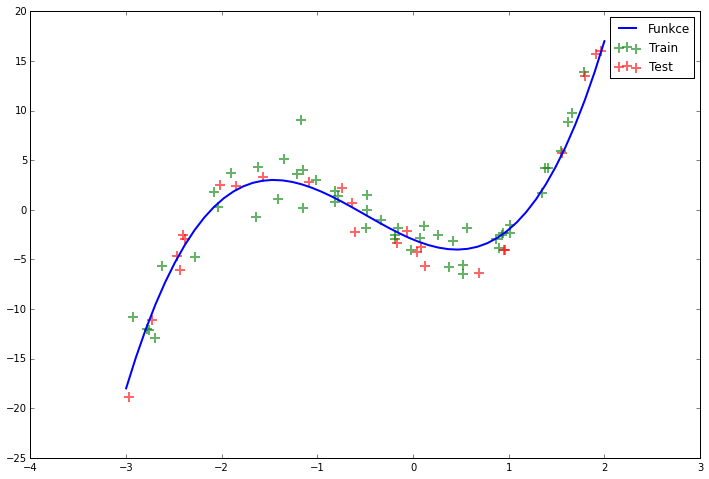

In [199]:
import numpy as np

np.random.seed(1234)

# definujeme jednoduchou kubickou funkci
def fce(x):
    return 2*x*x*x+3*x*x-4*x-3

x = np.random.random(75)*5-3
y = fce(x) + 2*np.random.randn(75)

# prvnich 50 vzorku je trenovaci mnozina, zbytek je testovaci
train_x, train_y = x[:50], y[:50]
test_x, test_y = x[50:], y[50:]

# tohle nam umozni zobrazovat obrazky primo v notebooku
%matplotlib inline
import matplotlib.pyplot as plt

# namalujeme trenovaci a testovaci mnozinu a funkci bez sumu
plt.figure(figsize=(12,8))
plt.scatter(train_x, train_y, c='green', marker='+', s=100, alpha=0.6, linewidths=2, label='Train')
plt.scatter(test_x, test_y, c='red', marker='+', s=100, alpha=0.6, linewidths=2, label='Test')

lin_x = np.linspace(-3, 2)
lin_y = fce(lin_x)

plt.plot(lin_x, lin_y, c='blue', linewidth=2, label='Funkce')
plt.legend()
plt.show() # neni treba, ale sezere jednu radku vypisu, ktera je zbytecna a nevypada pekne :-)

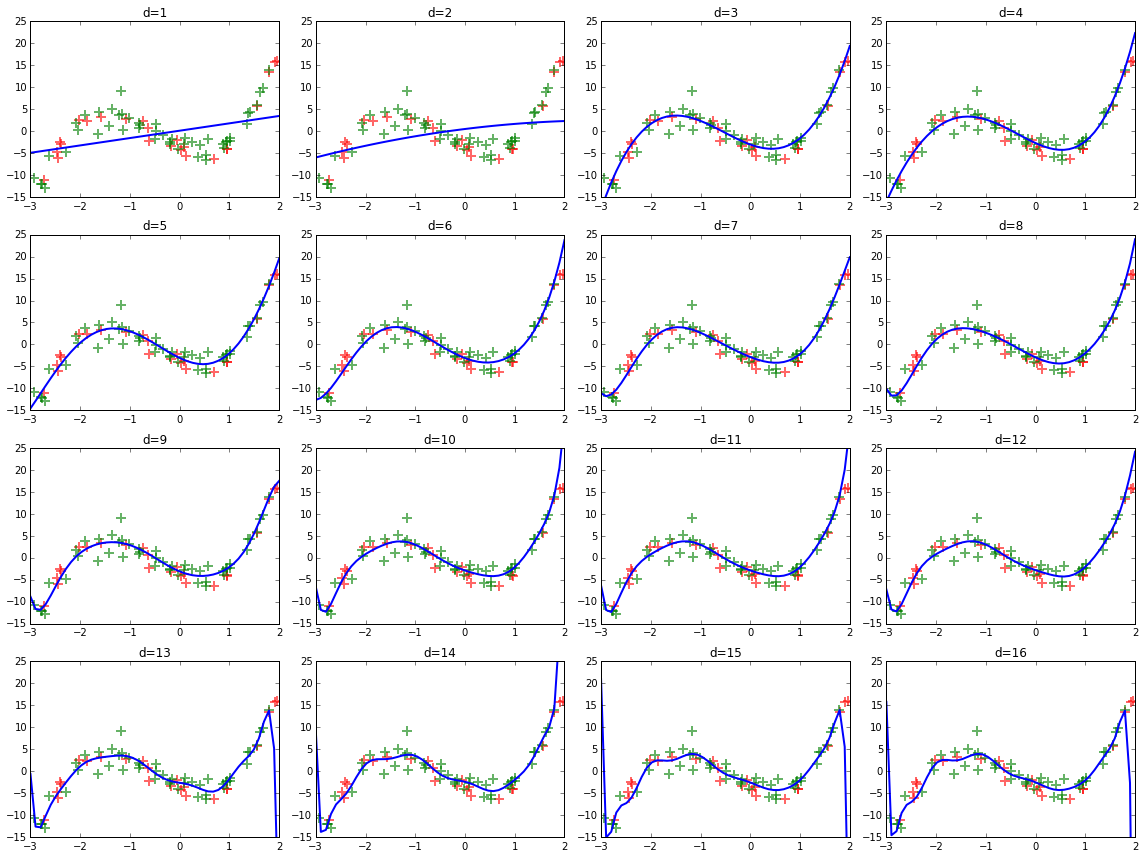

In [200]:
mse_tr = []
mse_te = []


# nakreslime obrazky polynomu ruznych stupnu a spocitame si mse na trenovaci a testovaci mnozine
plt.figure(figsize=(16,12))
for i in range(1,17):
    plt.subplot(4,4,i)
    p1 = np.poly1d(np.polyfit(train_x, train_y, i))
    residuals_tr = p1(train_x)-train_y
    residuals_te = p1(test_x)-test_y
    mse_tr.append(1/len(residuals_tr)*np.dot(residuals_tr, residuals_tr))
    mse_te.append(1/len(residuals_te)*np.dot(residuals_te, residuals_te))
    plt.scatter(test_x, test_y, c='red', marker='+', s=100, alpha=0.6, linewidths=2, label='Data')
    plt.scatter(train_x, train_y, c='green', marker='+', s=100, alpha=0.6, linewidths=2, label='Data')
    plt.plot(lin_x, p1(lin_x), c='blue', linewidth=2, label=('d=%d'%i))
    plt.title('d=%d'%i)
    plt.ylim([-15, 25])
    plt.xlim([-3,2])

plt.tight_layout()

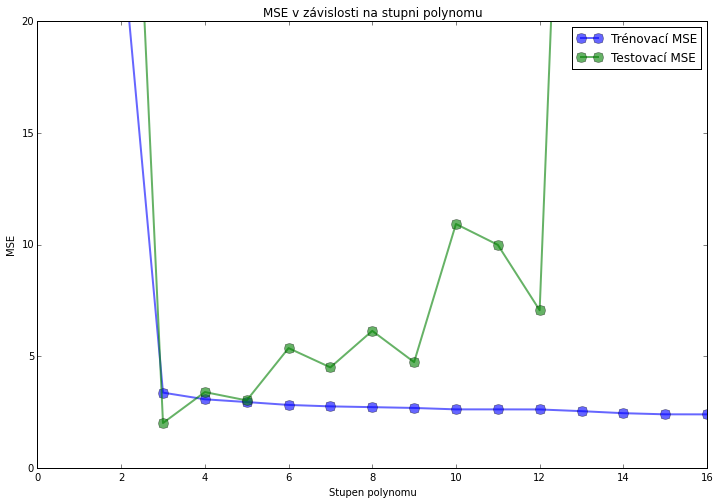

In [203]:
# nakreslime zavislost trenovaci a testovaci chyby na stupni polynomu
plt.figure(figsize=(12,8))
plt.plot(range(1,17), mse_tr, linewidth=2, marker='o', markersize=10, alpha=0.6, label='Trénovací MSE')
plt.plot(range(1,17), mse_te, linewidth=2, marker='o', markersize=10, alpha=0.6, label='Testovací MSE')
plt.ylim([0,20])
plt.legend()
plt.title('MSE v závislosti na stupni polynomu')
plt.ylabel('MSE')
plt.xlabel('Stupen polynomu')
plt.show()

Kromě MSE máme i další podobné regresní metriky, např. střední absolutní chybu nebo mediánovou ablolutní chybu. Od MSE se liší použitím absolutní hodnoty místo druhé mocniny (a v případě střední mediánové chyby navíc i použitím mediánu místo průměru).

### Koeficient determinace ($R^2$ skóre)

Ve statistice se ještě často používá tzv. $R^2$ skóre. Ta vyjadřuje jaká část rozptylu v datech je vysvětlena pomocí zvoleného modelu a počítá se jako $$R^2 = 1 - \frac{MSE}{var(y)}$$

## Metriky pro klasifikaci

V klasifikaci se používá mnohem širší škála metrik, než v regresi, v této části se podíváme na několik nejčastějších.

### Accuracy

Nejjednodušší metrikou je accuracy, ta prostě počítá, kolik procent vzorů bylo správně klasifikováno. Právě její jednoduchost způsobuje, že je často zavádějící. Například, když máme datovou množinu, kde 98% instancí patří do jedné třídy a zbytek do druhé, tak jakíkoliv accuracy nižší než 98% je špatná (tj. horší, než klasifikátor, který stále předpovídá nejčastější třídu).

### Precision a recall

Precision (P) a recall (R) částečně problém, který ma accuracy, řeší. Precision vyjadřuje, kolik procent ze vzorků, které jsou přiřazeny do dané třídy do ní opravdu patří a recall naopak říká, kolik procent vzorků, které patří do dané třídy klasifikátor označil, jako že do ní patří. 

### F-skóre

F-skóre kombinuje precision a recall a poskytuje jedno číslo, které vyjadřuje jako dobře klasifikýtor funguje. Často popisuje jeho fungování lépe, než jakákoliv z dřívějších metrik. Spočítá se jako harmonický průměr precision a recall $$F=\frac{2PR}{P+R}.$$

Zkusme si zase vygenerovat nějaký jednoduchý příklad na klasifikaci a podívat se, jak se chová jeden z nejjedodušších klasifikátorů - kNN (k nejbližších sousedů). Schválně najdeme takový seed a nastavíme takové směrodatné odchylky, aby se nám dva clustery překrývaly (jinak je úloha opravdu jednoduchá).

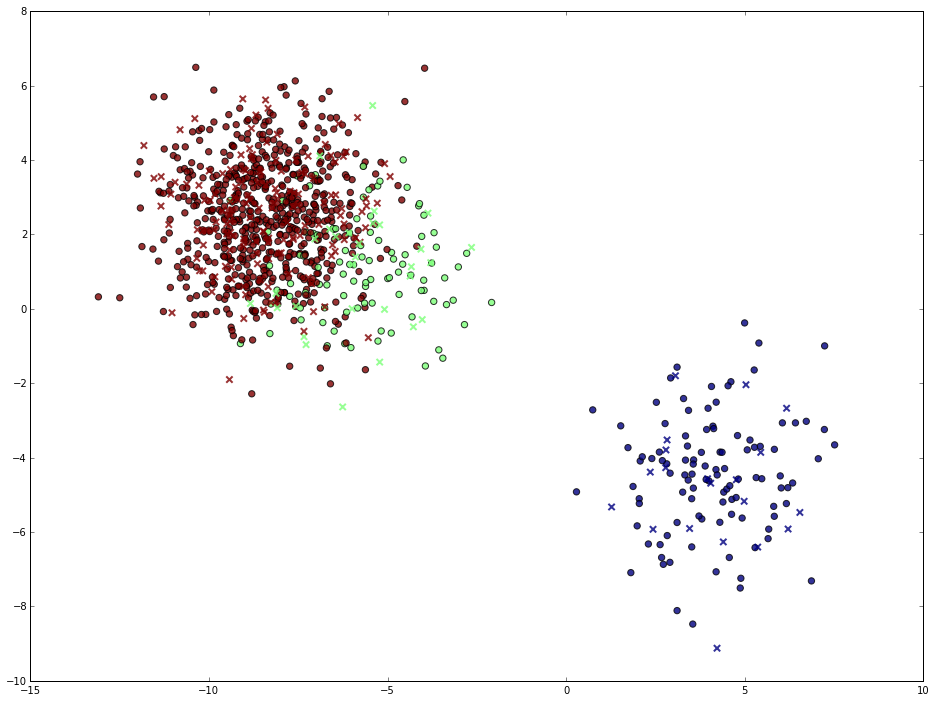

In [296]:
from sklearn import datasets

# vygenerujeme si trenovaci mnozinu, pouzijeme dva volani funkce, abysme mohli vytvorit jeden vetsi blob a dva mensi
X1, y1 = datasets.make_blobs(n_samples=250, n_features=2, centers=2, cluster_std=1.5, random_state=123)
X2, y2 = datasets.make_blobs(n_samples=750, n_features=2, centers=1, cluster_std=1.5, random_state=7)

# posuneme velky blob aby se prekryval s mensimi (samozrejme funguje jen pro zvolene seedy)
X2 = X2-[0,3]

# nastavime cilovou tridu velkeho blobu na 2 (make_blobs vzdy generuje cisla od 0)
y2 = y2+2

# spojime vystupy z tech dvo blobu do jedne mnoziny
X = np.vstack([X1, X2])
y = np.append(y1, y2)

# zamichame mnozinu a rozdelime ji na testovaci a trenovaci data
shuffle=np.random.permutation(len(y))

X = X[shuffle]
y = y[shuffle]

train_x, test_x = X[:800], X[800:]
train_y, test_y = y[:800], y[800:]

# nakonec mnozinu nakreslime
plt.figure(figsize=(16, 12))
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, marker='o', s=40, alpha=0.8)
plt.scatter(test_x[:,0], test_x[:,1], c=test_y, marker='x', s=40, linewidths=2, alpha=0.8)
plt.show()

Zkusme se napřed podívat, jak funguje jednoduchý klasifikátor.

Accuracy: 0.90

Confusion matrix:
[[ 20   0   0]
 [  0  16  14]
 [  0   6 144]]

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       0.73      0.53      0.62        30
          2       0.91      0.96      0.94       150

avg / total       0.89      0.90      0.89       200



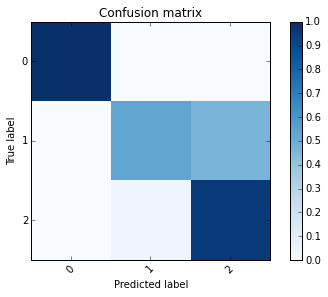

In [327]:
from sklearn import neighbors
from sklearn import metrics

# natrenujeme jednoduchy klasifikator zalozeny na k nejblizsich sousedech
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_x, train_y)

clf_y = clf.predict(test_x)

# spocitame jednotlive metriky pro tento klasifikator
print('Accuracy: %.2f' % metrics.accuracy_score(test_y, clf_y))

print()
print('Confusion matrix:')
print(metrics.confusion_matrix(test_y, clf_y, ))

print()
print('Classification report:')
print(metrics.classification_report(test_y, clf_y))

# confusion matrix se da i namalovat, mne osobne to pomaha rychleji poznat, jak je model dobry
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0,1,2]
    plt.xticks(tick_marks, [0,1,2], rotation=45)
    plt.yticks(tick_marks, [0,1,2])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(test_y, clf_y)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # "numpy magic" na normalizaci radek matice (lepsi v obrazku)
    
plot_confusion_matrix(cm_normalized)

Podívejme se zase, jak se mění předpovědi jednoduchého modelu v závislosti na jeho složitosti na našich datech.

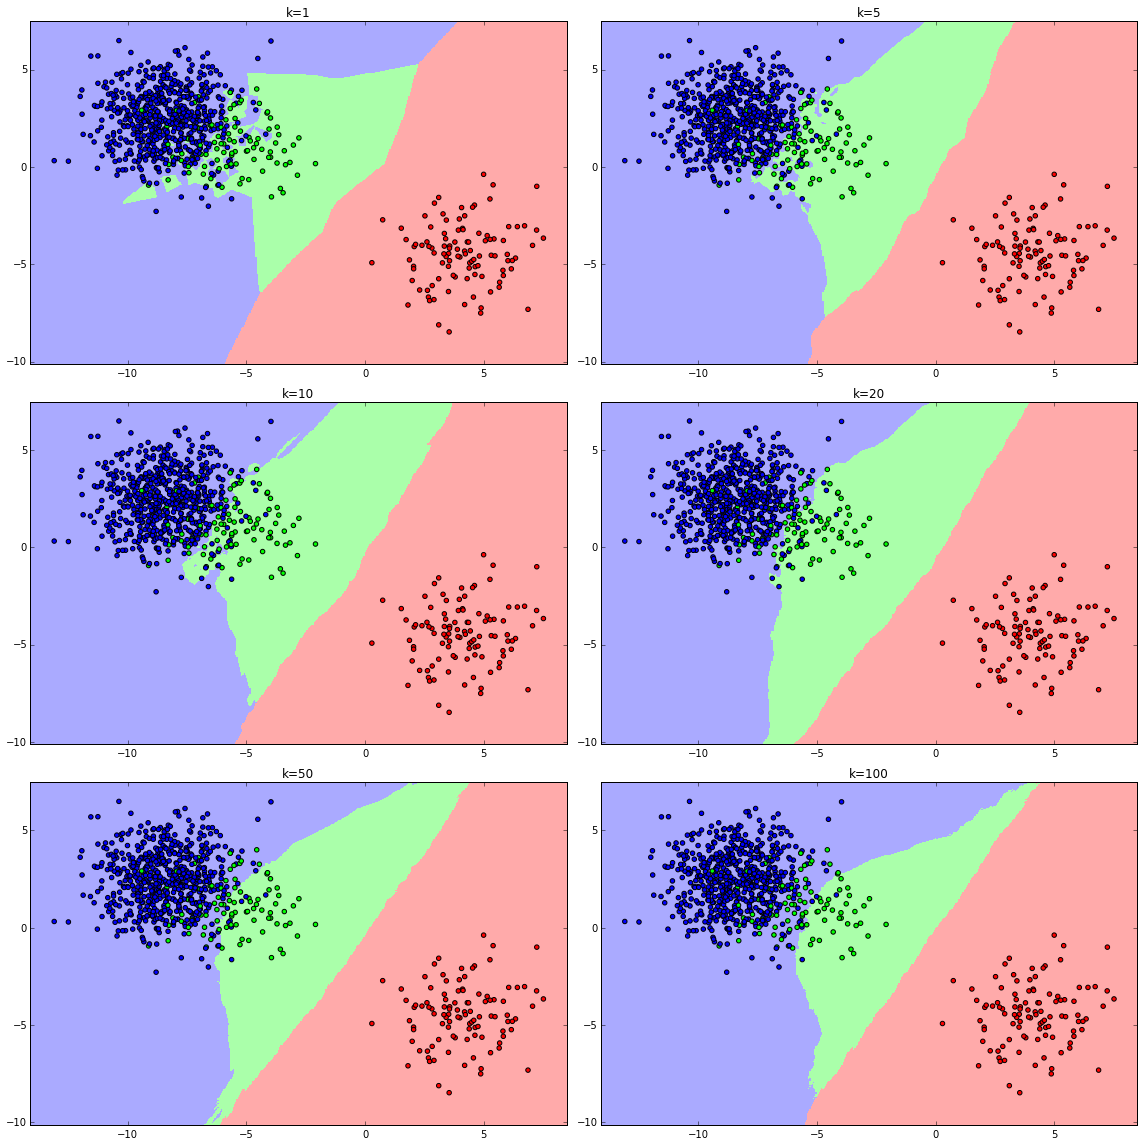

In [321]:
from matplotlib import colors

# zvolime si hezke barvicky na kresleni rozhodovaci hranice modelu
cmap_light = colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# a nakreslime rozhodovaci hranici pro model s ruznym k 
# (silne inspirovano http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)
plt.figure(figsize=(16,16))
for j, i in zip(range(1,7),[1, 5, 10, 20, 50, 100]):
    plt.subplot(3, 2, j)
    
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(train_x, train_y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("k=%d" % i)

plt.tight_layout()

### $\kappa$ statistika

Zajímavou metrikou, která se používá hlavně v případě, kdy cílem je předpovídat např. hodnocení filmů (a obecně cokoliv, kde jsou třídy uspořádané) je $\kappa$ statistika. Ta v zásadě určuje shodu dvou hodnotitelů. Ma ještě váženou variantu, kde jsou různé chyby považovány za různě závažné. Právě v případě, kdy mezi třídami existuje rozumné uspořádání se hodí použít kvadraticky važenou kappu, která má váhy určené jako druhou mocninu rozdílu přiřazené a skutečné váhy. 

Samotný výpočet $\kappa$ statistiky je celkem složitý, můžete ho najít např. na Wikipedii (https://en.wikipedia.org/wiki/Cohen%27s_kappa), nicméně naimplementovaný je v knihovně ml_metrics (https://github.com/benhamner/Metrics/tree/master/Python).

### Logloss (cross-entropy)

V některých případech místo predikce konrétní třídy raši chceme pravděpodobnost, že daný vzorek do dané třídy patří. V takovém případě se pro ohodnocení modelů hodi tzv. cross-entropie. $$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})$$

### TODO: AUC

http://gim.unmc.edu/dxtests/roc3.htm